<a href="https://colab.research.google.com/github/abmorte/dbscan/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSAN - Density-based Spatial Clustering of Applications with Noise

#### Imports

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.spatial import distance
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

#### Método

In [ ]:
"""
Dados a) um dataset X, b) o raio de uma vizinhança E e c) o número mínimo de pontos minPts:

1. Para cada ponto do dataset X, encontre os pontos que estão dentro do raio da vizinhança E;
2. Identifique os corePoints, isto é, os pontos que têm ao menos minPts vizinhos;
3. Encontre todos os Componentes Conectados de cada corePoint. Este agrupamento de pontos conectados por densidade constitui um cluster;
4. Cada borderPoint pertence a um cluster se este cluster é alcançável por densidade, senão o borderPoint é considerado ruído.   

Obs. Dado ponto pode inicialmente ser considerado ruído e depois revisto para pertencer a um cluster, mas uma vez pertencente a um cluster 
nunca será desassociado deste.
"""

In [6]:
def neighborsGen(X, point, eps):
    """
    Gera os vizinhos de um ponto;
        itera através de X e retorna os índices dos pontos que estão dentro do raio da vizinhança eps.
    """
    neighbors = []
    
    for i in range(0, X.shape[0]):
        if distance.euclidean(X[point], X[i]) < eps:
            neighbors.append(i)
            
    return neighbors

In [7]:
def expand(X, clusters, point, neighbors, currentPoint, eps, minPts):
    """
    Expande o cluster a partir de um ponto até que os limites da vizinhança sejam alcançados.
    """
    clusters[point] = currentPoint
    
    i = 0
    while i < len(neighbors):
        nextPoint = neighbors[i]
        
        if clusters[nextPoint] == -1:
            clusters[nextPoint] = currentPoint
            
        elif clusters[nextPoint] == 0:
            clusters[nextPoint] = currentPoint
            
            nextNeighbors = neighborsGen(X, nextPoint, eps)
            
            if len(nextNeighbors) >= minPts:
                neighbors = neighbors + nextNeighbors
        
        i += 1

In [ ]:
def simple_DBSCAN(X, clusters, eps, minPts):
    """
    Driver;
        itera através de neighborsGen para cada ponto em X;
        expande o cluster para cada ponto não rotulado como ruído.
    """
    currentPoint = 0
    
    for i in range(0, X.shape[0]):
        if clusters[i] is not 0:
            continue
        
        neighbors = neighborsGen(X, i, eps)
        
        if len(neighbors) < minPts:
            clusters[i] = -1 # ruído
        else:
            currentPoint += 1
            expand(X, clusters, i, neighbors, currentPoint, eps, minPts)
            
    return clusters

In [9]:
class Basic_DBSCAN:
    """
    Parâmetros:
    - eps: raio de vizinhança
    - minPts: número de vizinhos necessários para nomear um ponto como corePoint
    """
    
    def __init__(self, eps, minPts):
        self.eps = eps
        self.minPts = minPts
        
    def fit_predict(self, X):
        """
        Parâmetros:
        - X: dataset com os dados a serem agrupados (??)
        
        Retorno:
        - clusters: pontos rotulados com os clusters encontrados, -1 para ruído
        """
        
        clusters = [0] * X.shape[0]
        
        simple_DBSCAN(X, clusters, self.eps, self.minPts)
        
        return clusters

#### Dataset IRIS

In [ ]:
# iris10.csv: 10 registros do IRIS dataset para facilitar o desenvolvimento
# iris.csv: todo o IRIS dataset 
df = pd.read_csv('data\iris.csv')             # execucao local
# df = pd.read_csv('/content/data/iris.csv')    # execucao no Colab: 
df.drop('class', axis=1, inplace=True)
df

#### Normalização dos dados

In [ ]:
X = StandardScaler().fit_transform(df)
X

#### Clusters encontrados (ruídos inclusos)

In [ ]:
clusters = Basic_DBSCAN(eps = .85, minPts = 7).fit_predict(X)
clusters

#### Gráfico de pontos agrupados por clusters e ruídos

<AxesSubplot: >

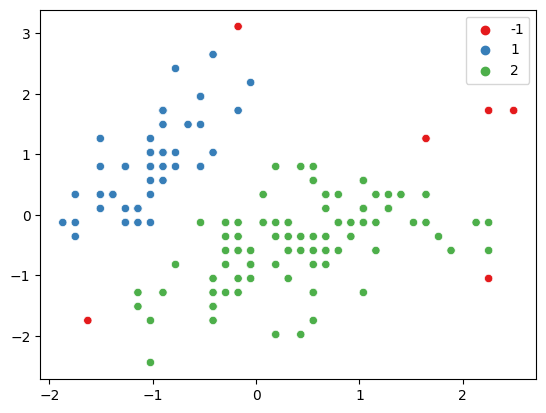

In [13]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = clusters, palette = 'Set1')